In [3]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
X=df[['person_age','person_income','loan_amnt','cb_person_cred_hist_length']]
y=df['loan_status']


In [22]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25,metric='euclidean')
knn.fit(X_train,y_train)

,n_neighbors,25
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


Accuracy: 0.8126438545342949


<Axes: >

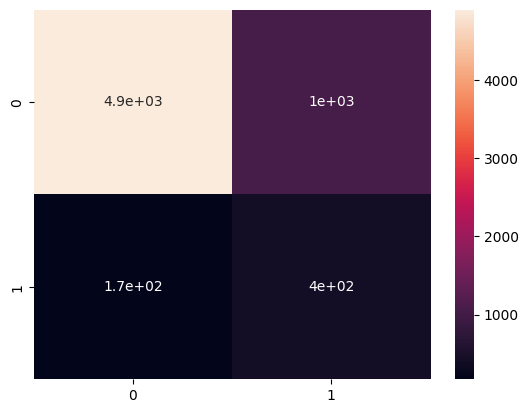

In [25]:
y_pred=knn.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy:",accuracy_score(y_test,y_pred))
import seaborn as sns
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)